# Read in data

In [1]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [2]:
training_data = unpickle('cifar-10-batches-py/data_batch_1')
testing_data = unpickle('cifar-10-batches-py/data_batch_2')

In [3]:
training_data

{b'batch_label': b'training batch 1 of 5',
 b'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 71,  60,  74, ...,  68,  69,  68],
        [250, 254, 211, ..., 215, 255, 254],
        [ 62,  61,  60, ..., 130, 130, 131]], dtype=uint8),
 b'filenames': [b'leptodactylus_pentadactylus_s_000004.png',
  b'camion_s_000148.png',
  b'tipper_truck_s_001250.png',
  b'american_elk_s_001521.png',
  b'station_wagon_s_000293.png',
  b'coupe_s_001735.png',
  b'cassowary_s_001300.png',
  b'cow_pony_s_001168.png',
  b'sea_boat_s_001584.png',
  b'tabby_s_001355.png',
  b'muntjac_s_001000.png',
  b'arabian_s_001354.png',
  b'quarter_horse_s_000672.png',
  b'passerine_s_000343.png',
  b'camion_s_001895.png',
  b'trailer_truck_s_000335.png',
  b'dumper_s_000821.png',
  b'alley_cat_s_000200.png',
  b'accentor_s_000677.png',
  b'frog_s_001671.png',
  b'capreolus_capreolus_s_000051.png',
  b'tomca

# Show raw Image

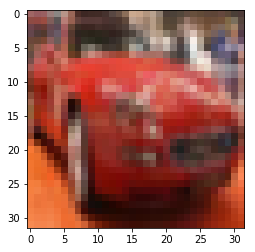

In [53]:
import matplotlib
import numpy as np
%matplotlib inline
im = training_data[b'data'][5]
im = im.reshape(3,32,32).transpose([1,2,0])
matplotlib.pyplot.imshow(im)

# PCA for Dimension Reduction

In [69]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1500) # n_components decide how many dimensions to keep
#pca.fit(training_data[b'data'])
#print(pca.explained_variance_ratio_)
dim_reduction_train_data = pca.fit_transform(training_data[b'data'])
dim_reduction_test_data = pca.transform(testing_data[b'data'])
print(dim_reduction_train_data.shape)
print(sum(pca.explained_variance_ratio_))

(10000, 1500)
0.999379877984


# Show image after PCA 

(10000, 3072)


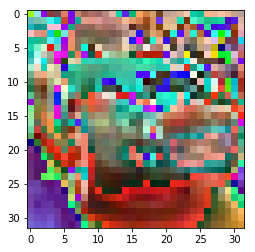

In [70]:
temp = pca.inverse_transform(dim_reduction_train_data)
print(temp.shape)
temp = np.reshape(temp, (10000, 3, 32, 32))
im_show = temp[5]
lower_bound = np.min(im_show, axis=1)
lower_bound = np.min(lower_bound)
upper_bound = np.max(im_show, axis=1)
upper_bound = np.max(upper_bound)
im_show = im_show - lower_bound
im_show *= 255.0/upper_bound - lower_bound
im_show = im_show.astype(np.uint8)
matplotlib.pyplot.imshow(im_show.transpose([1, 2, 0]))

# SVM for classification

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(dim_reduction_train_data, training_data[b'labels'])

In [8]:
predicted = clf.predict(dim_reduction_test_data)
from sklearn import metrics
metrics.accuracy_score(testing_data[b'labels'], predicted)

0.10100000000000001

In [4]:
import pandas as pd
pd_results = pd.DataFrame([
        ['No PCA', 0],
        ['500', 0],
        ['1000', 0],
        ['1500', 0],
        ['2000', 0],
        ['2500', 0],
        ['3000', 0]
    ], columns=['Number of PCA Components', 'Accuracy'])
pd_results.plot(x='Number of PCA Components')
pd_results.plot(kind='barh', x='Number of PCA Components', y='Accuracy')